In [2]:
import os, sys
import h5py
import numpy as np
from scipy.io import loadmat
import cv2
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import matrix as mat

In [3]:
#HDF5的读取：
f = h5py.File('valid.h5','r')   
for key in f.keys():
    print(f[key].name)
    print(f[key].shape)
    #print(f[key].value)                       
f.close()

/center
(394, 2)
/scale
(394,)


In [4]:
#HDF5的读取：
f = h5py.File('cameras.h5','r')   
for key in f.keys():
    print(f[key].name)
    #print(f[key].shape)
    #print(f[key].value)                       
f.close()

/3dtest
/subject1
/subject11
/subject5
/subject6
/subject7
/subject8
/subject9


In [5]:
m = loadmat("valid.mat")
print(m.keys())

dict_keys(['__header__', '__version__', '__globals__', 'annot'])


In [6]:
m["__header__"]

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun May  7 20:54:58 2017'

In [7]:
m["__version__"]

'1.0'

In [8]:
m["annot"]

array([[(array([[array(['S9_Posing_1.55011271_000001'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000006'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000011'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000016'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000021'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000026'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000031'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000036'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000041'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000046'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000051'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000056'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000061'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000066'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000071'], dtype='<U27')],
       [array(['S9_Posing_1.55011271_000076'],

In [9]:
type(m["annot"])

numpy.ndarray

In [10]:
image_name = m["annot"][0][0][0]
image_name.shape

(394, 1)

In [11]:
center = m["annot"][0][0][1]
center.shape

(394, 2)

In [12]:
scale = m["annot"][0][0][2]
scale.shape

(394, 1)

In [13]:
gt = m["annot"][0][0][3]
gt.shape

(394, 3, 17)

In [14]:
K = m["annot"][0][0][4]
K.shape

(394, 1)

In [15]:
K_cam = K[0][0].tolist()
K_cam

[[1149.67569986785, 0.0, 508.848621645943],
 [0.0, 1147.59161666764, 508.064917088557],
 [0.0, 0.0, 1.0]]

In [16]:
img1_gt = gt[0]   # array 3 by 17
kp = np.zeros((17,2))
for i in range(17):
    u = K_cam[0] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    v = K_cam[1] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    w = K_cam[2] * mat([img1_gt[0][i], img1_gt[1][i], img1_gt[2][i]]).T
    kp[i][0] = u/w
    kp[i][1] = v/w
#kp #array 17 by 2

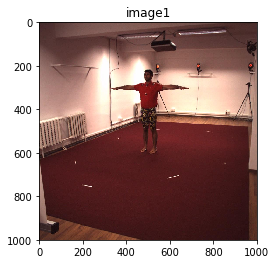

In [17]:
img = cv2.imread("S9_Posing_1.55011271_000001.jpg")
plt.figure("Image") # 图像窗口名称
plt.imshow(img[:,:,[2,1,0]])
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1') # 图像题目
plt.show()

Text(0.5, 1.0, 'image1_kp')

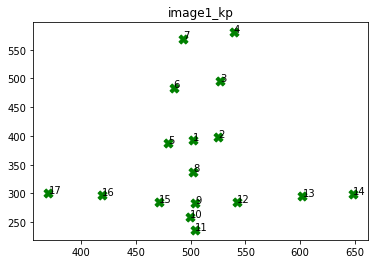

In [18]:
txt = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
img_kp = plt.scatter(kp[:,0], kp[:,1], s = 80, c = 'g', marker = 'X')
for i in range(17):
    plt.annotate(txt[i], xy = (kp[i,0], kp[i,1]), xytext = (kp[i,0]+0.1, kp[i,1]+0.1)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1_kp') # 图像题目

Text(0.5, 1.0, 'image1_kp')

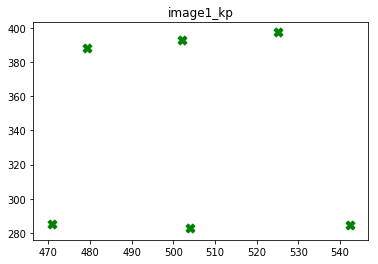

In [19]:
img_kp = plt.scatter(kp[0,0], kp[0,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[1,0], kp[1,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[4,0], kp[4,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[8,0], kp[8,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[11,0], kp[11,1], s = 80, c = 'g', marker = 'X')
img_kp = plt.scatter(kp[14,0], kp[14,1], s = 80, c = 'g', marker = 'X')
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1_kp') # 图像题目

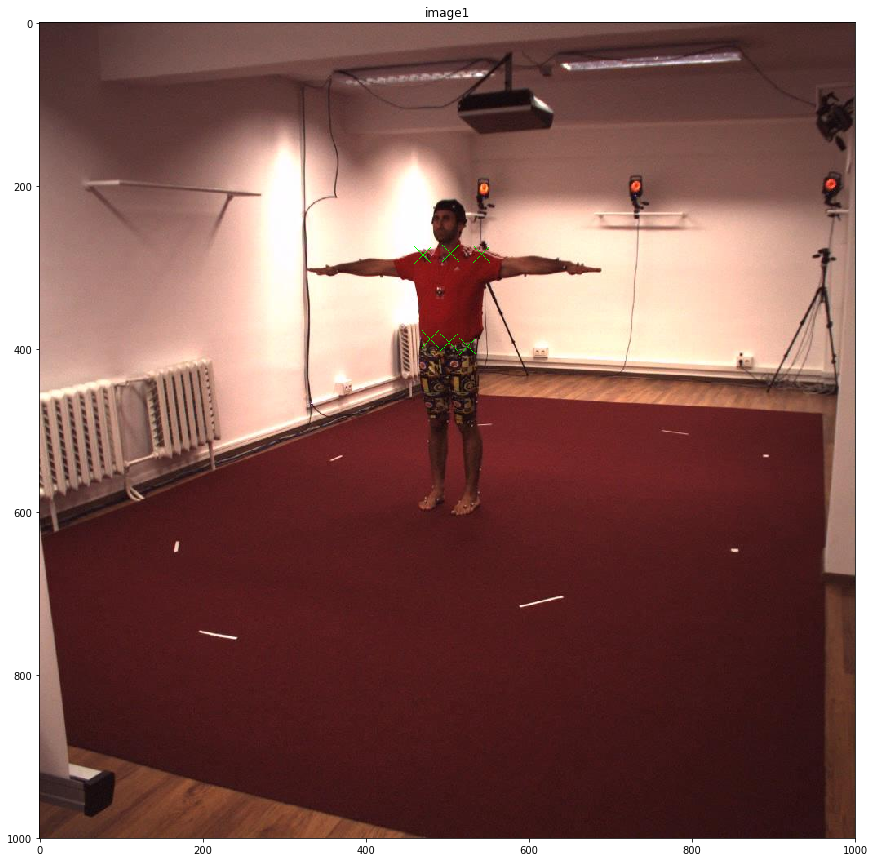

In [20]:
cv2.drawMarker(img, tuple([int(kp[0][0]), int(kp[0][1])]), (0,255,0), 1)
cv2.drawMarker(img, tuple([int(kp[1][0]), int(kp[1][1])]), (0,255,0), 1)
cv2.drawMarker(img, tuple([int(kp[4][0]), int(kp[4][1])]), (0,255,0), 1)
cv2.drawMarker(img, tuple([int(kp[8][0]), int(kp[8][1])]), (0,255,0), 1)
cv2.drawMarker(img, tuple([int(kp[11][0]), int(kp[11][1])]), (0,255,0), 1)
cv2.drawMarker(img, tuple([int(kp[14][0]), int(kp[14][1])]), (0,255,0), 1)
plt.figure(figsize=(15, 15)) #设置窗口大小
plt.imshow(img[:,:,[2,1,0]])
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1') # 图像题目
plt.show()

In [22]:
print(kp[8])

[504.03437999 283.12083346]
